## Import Libraries

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
sns.set_style("whitegrid")

### Importing Libraries for Statistical Modeling and Evaluation

In [7]:
from sklearn.experimental import enable_iterative_imputer

In [8]:
from sklearn.impute import IterativeImputer

In [9]:
import statsmodels.formula.api as smf

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
from sklearn.metrics import mean_absolute_error

In [12]:
from statsmodels.stats.anova import anova_lm

## Load the EdGap data set

In [21]:
edgap = pd.read_excel('/Users/hamdahassan/DATA5100/education/data/EdGap_data.xlsx', dtype={'NCESSCH School ID': object})

/opt/anaconda3/lib/python3.13/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


## Load the school information data set

In [22]:
school_information = pd.read_csv('/Users/hamdahassan/DATA5100/education/data/ccd_sch_029_1617_w_1a_11212017.csv', encoding='unicode_escape')

/var/folders/hw/46c6ylh95jq9bclrj3n0y2bw0000gn/T/ipykernel_90068/3179504065.py:1: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_information = pd.read_csv('/Users/hamdahassan/DATA5100/education/data/ccd_sch_029_1617_w_1a_11212017.csv', encoding='unicode_escape')


## Load the dataset that includes information about teacher presence

In [23]:
teacher_data = pd.read_csv('/Users/hamdahassan/DATA5100/education/data/ccd_sch_059_1617_l_2a_11212017.csv', encoding='unicode_escape')

## Exploring the contents of the datasets

In [24]:
teacher_data.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,TEACHERS,TOTAL_INDICATOR,DMS_FLAG
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,1,NaN,AL-210,100002,AL-210-0020,10000200277,100277,0.0,Education Unit Total,Reported
1,2016-2017,1,ALABAMA,AL,Camps,1,NaN,AL-210,100002,AL-210-0050,10000201667,101667,0.0,Education Unit Total,Reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,1,NaN,AL-210,100002,AL-210-0060,10000201670,101670,0.0,Education Unit Total,Reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,1,NaN,AL-210,100002,AL-210-0030,10000201705,101705,0.0,Education Unit Total,Reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,1,NaN,AL-210,100002,AL-210-0040,10000201706,101706,0.0,Education Unit Total,Reported


## Exploring the contents of the data sets

In [25]:
edgap.head()

,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [26]:
school_information.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,...,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported


In [27]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


In [28]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

In [29]:
teacher_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100062 entries, 0 to 100061
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SCHOOL_YEAR      100062 non-null  object 
 1   FIPST            100062 non-null  int64  
 2   STATENAME        100062 non-null  object 
 3   ST               100062 non-null  object 
 4   SCH_NAME         100062 non-null  object 
 5   STATE_AGENCY_NO  100062 non-null  int64  
 6   UNION            2488 non-null    float64
 7   ST_LEAID         100062 non-null  object 
 8   LEAID            100062 non-null  int64  
 9   ST_SCHID         100062 non-null  object 
 10  NCESSCH          100062 non-null  int64  
 11  SCHID            100062 non-null  int64  
 12  TEACHERS         96438 non-null   float64
 13  TOTAL_INDICATOR  100062 non-null  object 
 14  DMS_FLAG         100062 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 11.5+ MB


## Are the data suitable for answering the question?
- We can make a pair plot to explore the relationship between the variables. If the data are
not sufficient, we don't want to waste time looking through it.

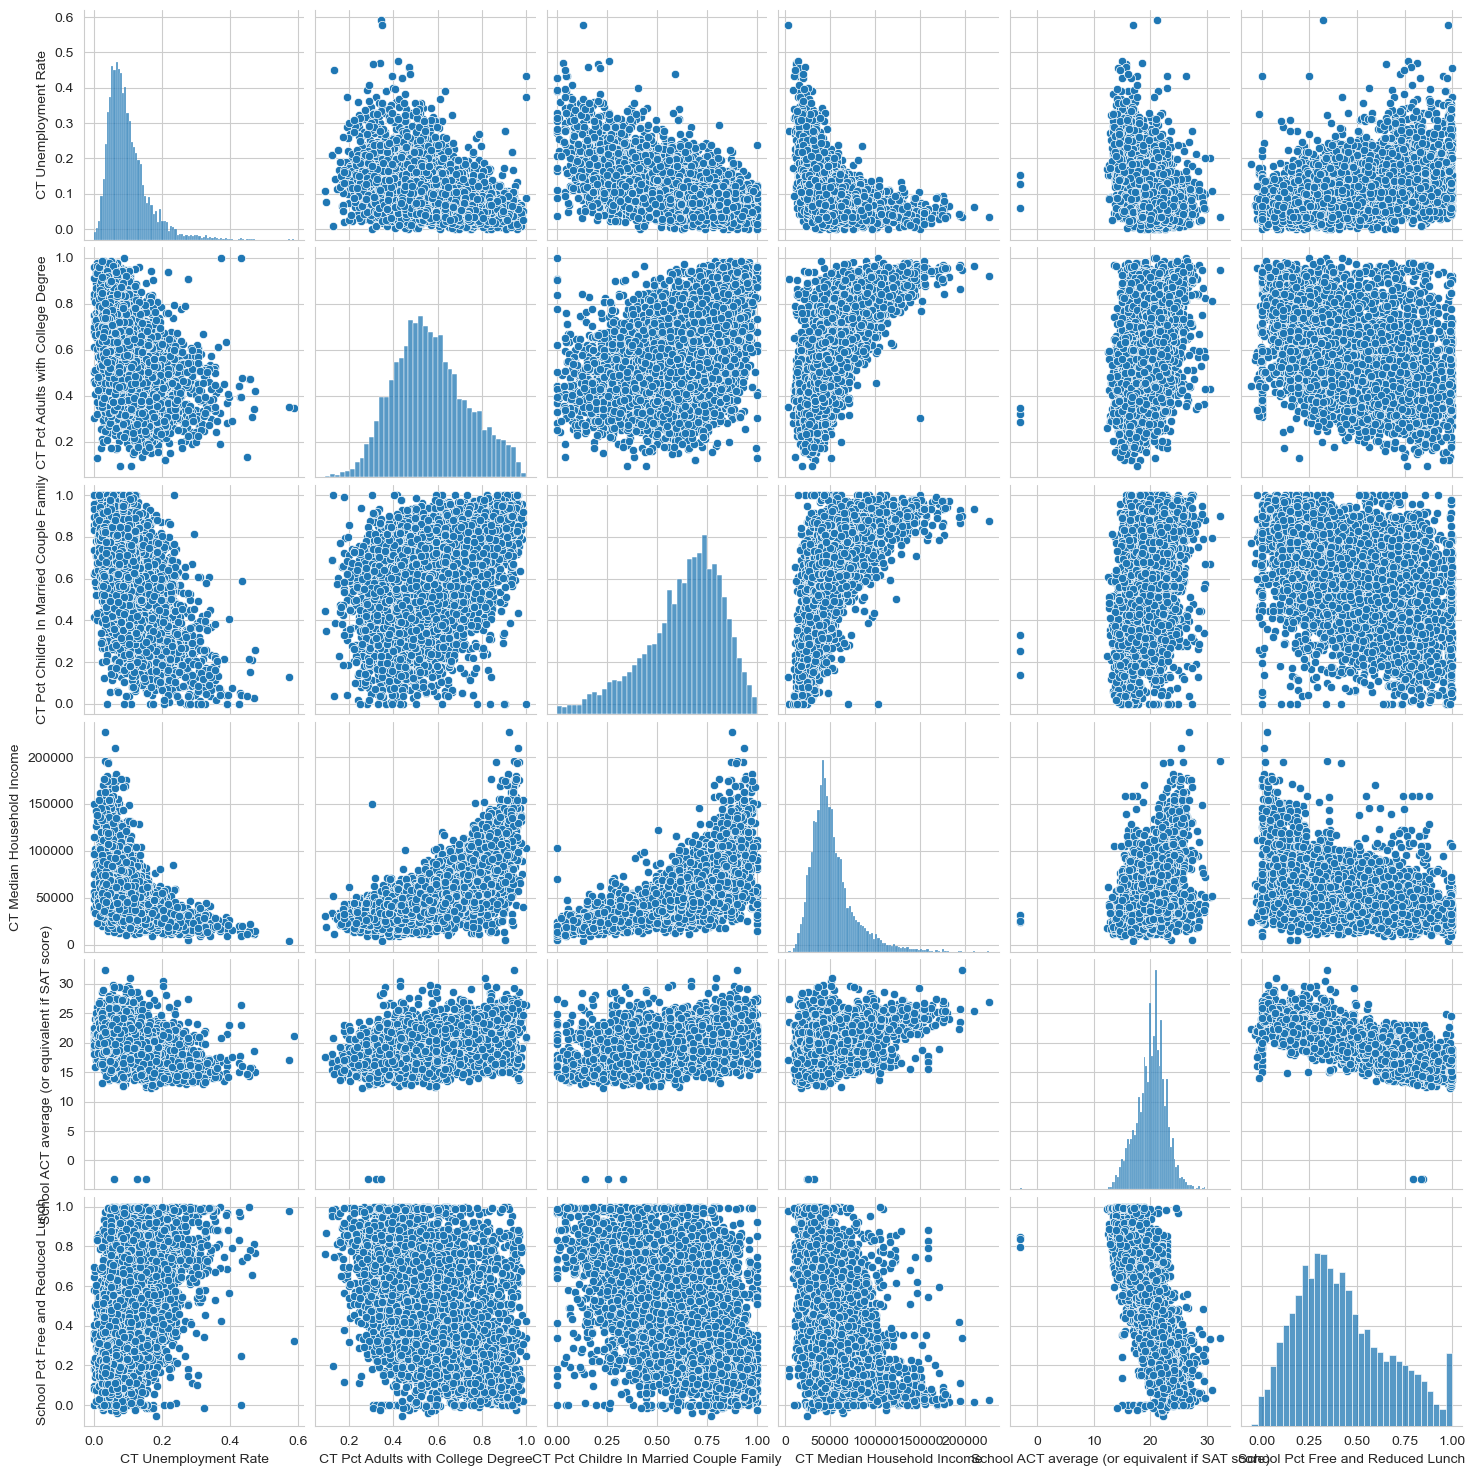

In [30]:
sns.pairplot(
    edgap.drop(columns='NCESSCH School ID')
);
plt.show()

## Data Preparation
- Select relevant subsets of the data. Get only the columns needed from the school information datatset (year, school identity, location, and school type information).
- get only the Teachers, and NCESSCH from the teacher_data
- Then explore the contents to see that everything is there.

In [31]:
school_information = school_information[['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT']]

In [32]:
teacher_data = teacher_data[['NCESSCH', 'TEACHERS']]

In [33]:
school_information.head()

,SCHOOL_YEAR,NCESSCH,LSTATE,LZIP,SCH_TYPE_TEXT,LEVEL,CHARTER_TEXT
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High,No
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High,No


In [34]:
teacher_data.head()

,NCESSCH,TEACHERS
0,10000200277,0.0
1,10000201667,0.0
2,10000201670,0.0
3,10000201705,0.0
4,10000201706,0.0


## Rename the columns of all datasets
- This allows us to follow best practices of style. 

In [35]:
edgap = edgap.rename(
    columns={
        "NCESSCH School ID": "id",
        "CT Pct Adults with College Degree": "percent_college",
        "CT Unemployment Rate": "rate_unemployment",
        "CT Pct Childre In Married Couple Family": "percent_married",
        "CT Median Household Income": "median_income",
        "School ACT average (or equivalent if SAT score)": "average_act",
        "School Pct Free and Reduced Lunch": "percent_lunch",
    }
)

In [36]:
school_information = school_information.rename(
    columns={
        "SCHOOL_YEAR": "year",
        "NCESSCH": "id",
        "LSTATE": "state",
        "LZIP": "zip_code",
        "SCH_TYPE_TEXT": "school_type",
        "LEVEL": "school_level",
        "CHARTER_TEXT": "charter"
    }
)

In [37]:
teacher_data = teacher_data.rename(columns={
    'NCESSCH': 'id',
    'TEACHERS': 'teachers'
})

In [38]:
edgap.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [39]:
school_information.head()

,year,id,state,zip_code,school_type,school_level,charter
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High,No
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High,No


In [40]:
teacher_data.head()

,id,teachers
0,10000200277,0.0
1,10000201667,0.0
2,10000201670,0.0
3,10000201705,0.0
4,10000201706,0.0


## Type casting and renaming columns
- In the edgap data, the NCESSCH is an object and in the school and teacher data, its a float.
- Cast the types of the school and teacher data to be objects.

In [41]:
school_information['id'] = school_information['id'].astype('object')

In [42]:
teacher_data['id'] = teacher_data['id'].astype('object')

In [43]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102183 non-null  object
 1   id            102181 non-null  object
 2   state         102183 non-null  object
 3   zip_code      102183 non-null  object
 4   school_type   102181 non-null  object
 5   school_level  102179 non-null  object
 6   charter       102179 non-null  object
dtypes: object(7)
memory usage: 5.5+ MB


In [44]:
teacher_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100062 entries, 0 to 100061
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        100062 non-null  object 
 1   teachers  96438 non-null   float64
dtypes: float64(1), object(1)
memory usage: 1.5+ MB


## Join the data frames and call the result df.
- Left join, which allows us to keep all of the information from the edgap dataset and bring in information from the school dataset where we have information about the socioeconomic varibales and act scores.
- Will then join that with the teacher data, where we will get information about the number of teachers per school

In [45]:
df = pd.merge(edgap, school_information, how='left', on='id')

In [46]:
df = pd.merge(df, teacher_data, how='left', on='id')

In [47]:
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level,charter,teachers
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes,25.0
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No,87.0
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No,95.0
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No,98.0
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No,134.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               7898 non-null   object 
 8   state              7898 non-null   object 
 9   zip_code           7898 non-null   object 
 10  school_type        7898 non-null   object 
 11  school_level       7898 non-null   object 
 12  charter            7898 non-null   object 
 13  teachers           7852 non-null   float64
dtypes: float64(7), object(7)
memory usage: 873.6+ KB


### Quality control
- We will look for values that are outside of the range of possible values for a particular variable.
- There are natural bounds for the numerical variables, so we will check that.
- We will use the describe() method to compute descriptive statistics for numerical variables in the dataset.            

In [49]:
df.select_dtypes(include=['number']).agg(['min', 'max']).round(2)

,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,teachers
min,0.00,0.09,0.0,3589.0,-3.07,-0.05,0.0
max,0.59,1.00,1.0,226181.0,32.36,1.00,570.1


## Perform data cleaning and validation to ensure that realistic and meaningful values are used in the analysis.
- Handling invalid values, checking school type distribution, checking for duplicate rows, only including high schools, checking the states we have data for, etc.

In [53]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan

In [54]:
df.loc[df['average_act'] < 1, 'average_act'] = np.nan

In [55]:
df['school_type'].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

In [56]:
df['school_level'].value_counts()

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

In [57]:
df['charter'].value_counts()

charter
No                7329
Yes                352
Not applicable     217
Name: count, dtype: int64

In [58]:
df = df.loc[df['school_level'] == 'High']

In [59]:
df['school_level'].value_counts()

school_level
High    7230
Name: count, dtype: int64

In [60]:
df.duplicated().sum()

np.int64(0)

In [61]:
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,3
percent_lunch,20
year,0
state,0
zip_code,0


In [62]:
percent_missing = df.isna().mean().round(4) * 100

In [63]:
percent_missing.to_frame(name='Percent Missing Values')

,Percent Missing Values
id,0.00
rate_unemployment,0.17
percent_college,0.15
percent_married,0.28
median_income,0.22
average_act,0.04
percent_lunch,0.28
year,0.00
state,0.00
zip_code,0.00


In [64]:
df['state'].value_counts()

state
TX    913
OH    654
IL    564
PA    543
MI    498
NC    407
FL    404
GA    367
WI    351
NJ    341
MO    337
IN    321
NY    295
TN    265
WA    263
MA    253
KY    198
LA    194
WY     38
DE     24
Name: count, dtype: int64

In [65]:
df['state'].nunique()

20

In [66]:
df = df.dropna(subset=['average_act'])

In [67]:
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,0
percent_lunch,20
year,0
state,0
zip_code,0


## DATA imputation
- We will take the data we have and replace the NaNs with values that we can estimate from the data.
- We will start with defining predictor variables that we want to use in our analysis to predict the average act score.
- We will impute the missing values of these variables.

In [68]:
predictor_variables = [
    'rate_unemployment',
    'percent_college',
    'percent_married',
    'median_income',
    'percent_lunch',
    'state',
    'charter',
    'teachers'
]

## Using iterative imputer to replace the missing values.
- Fit the imputer using the numerical predictor variables.
- Define the imputer.
- Fit the imputer with the data from those columns

In [69]:
imputer = IterativeImputer()

In [70]:
numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()
print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch', 'teachers']


In [71]:
imputer.fit(df.loc[:, numerical_predictors])

IterativeImputer()

## Apply transform() method
- We will apply the transform() method to replace the values

In [72]:
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

In [73]:
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,0
percent_college,0
percent_married,0
median_income,0
average_act,0
percent_lunch,0
year,0
state,0
zip_code,0


## Export the clean data set

In [ ]:
df.to_csv('education_clean.csv', encoding='utf-8-sig', index=False)

### Comparing ACT Scores Between Charter and Non-Charter Schools
- Explore the contents of the charter column
- Check for NaNs in the charter column and get rid of them.

In [74]:
df_charter = df[['average_act', 'charter']].copy()

In [75]:
df_charter.head()

,average_act,charter
0,20.433455,Yes
1,19.498168,No
2,19.554335,No
3,17.737485,No
4,18.245421,No


In [76]:
df_charter['charter'].isna().sum()

np.int64(0)

In [77]:
df_charter['average_act'].isna().sum()

np.int64(0)

In [78]:
df['charter'] = df['charter'].replace(['Not applicable', 'N/A', 'n/a', 'NA', 'nan'], np.nan)
df_charter = df[['charter', 'average_act']].dropna(subset=['charter'])

In [79]:
df_charter['charter'].isna().sum()

np.int64(0)

## Charter vs. Noncharter schools chart.
Explore the relationship between school type (charter vs. non-charter) and average ACT scores.

/var/folders/hw/46c6ylh95jq9bclrj3n0y2bw0000gn/T/ipykernel_90068/4181982449.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='charter', palette=['#4c72b0', '#dd8452'])


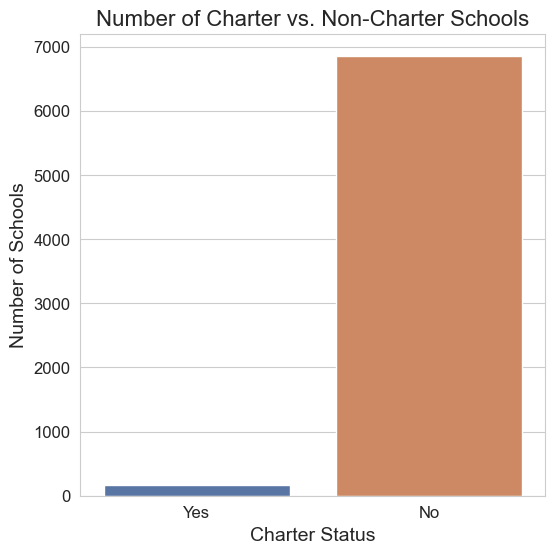

In [80]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='charter', palette=['#4c72b0', '#dd8452'])
plt.title('Number of Charter vs. Non-Charter Schools', fontsize=16)
plt.xlabel('Charter Status', fontsize=14)
plt.ylabel('Number of Schools', fontsize=14)
plt.tick_params(labelsize=12)
plt.show()

## Count of schools labeled as charter, non-charter, and any missing values in the data.

In [81]:
df['charter'].value_counts(dropna=False)

charter
No     6858
NaN     199
Yes     170
Name: count, dtype: int64

## Single input model: ACT VS  Unemployment Rate 
- Starting with a single-input model to explore whether there's a relationship between ACT scores and unemployment rates before introducing more complex models.
- Plot the data and include a regression line to visualize the trend.
- The scatter plot shows a clear negative relationship between unemployment rate and average ACT scores

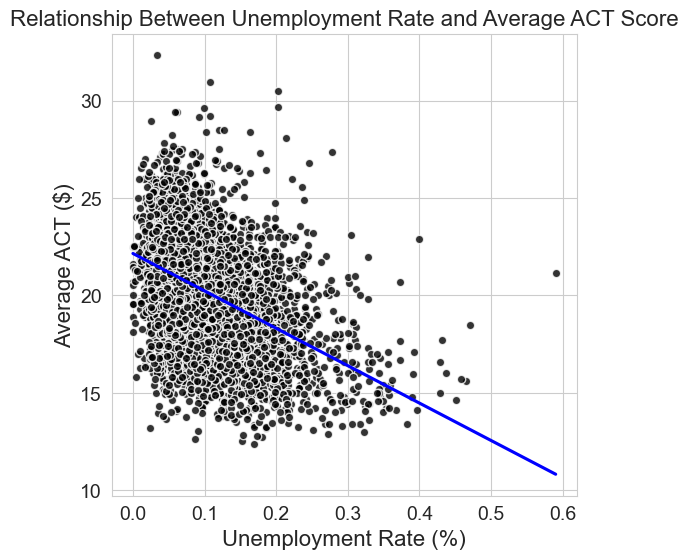

In [82]:
plt.figure(figsize=(6,6))

sns.regplot(data=df, 
            x='rate_unemployment',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color':'black', 'edgecolor':'white', 'linewidths':1})

plt.xlabel('Unemployment Rate (%)', fontsize=16)
plt.ylabel('Average ACT ($)', fontsize=16)
plt.title('Relationship Between Unemployment Rate and Average ACT Score', fontsize=16)
plt.tick_params(labelsize=14)

plt.show()

## Fit the model using a formula
- Display the model fit summary using the summary() method.
- Compute key error metrics

In [83]:
model_unemployment = smf.ols(formula='average_act ~ rate_unemployment', data=df).fit()

In [84]:
print(model_unemployment.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     1669.
Date:                Wed, 05 Nov 2025   Prob (F-statistic):               0.00
Time:                        01:07:48   Log-Likelihood:                -16149.
No. Observations:                7227   AIC:                         3.230e+04
Df Residuals:                    7225   BIC:                         3.232e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.1511      0.05

## Numerical Evaluation of Model Accuracy
- To evaluate model performance, computed several error metrics.
- R-squared, RMSE, mean squared error, mean absolute error
- The R-squared value (0.188) shows that unemployment explains about 19% of the variation in ACT scores.
- The RMSE (2.26) and MAE (1.74) indicate that the model's predictions are typically off by around 2 ACT points on average.

In [85]:
y_hat = model_unemployment.predict()

In [87]:
metrics_unemployment = {
    'R-squared': model_unemployment.rsquared.round(4),
    'RMSE': np.sqrt(mean_squared_error(df['average_act'], y_hat)),
    'MAE': mean_absolute_error(df['average_act'], y_hat)
}
print("--- Unemployment Model Metrics ---")
print(pd.Series(metrics_unemployment))

--- Unemployment Model Metrics ---
R-squared    0.187700
RMSE         2.260666
MAE          1.742219
dtype: float64


## Residuals vs Predicted ACT Scores scatter plot
- The points are fairly evenly spread above and below zero.
- The residuals do not display a clear structured pattern, which indicates that the relationship between unemployment rate and average ACT score is approximately linear.

(The residual plot helps assess whether the linear model appropriately captures the relationship between unemployment rate and ACT scores.
The residuals appear randomly scattered around zero, which suggests that the linear model is a reasonable fit for this data.
However, there is slightly greater variability in residuals for schools with lower predicted ACT scores, indicating that the model may not predict as precisely for those cases.)

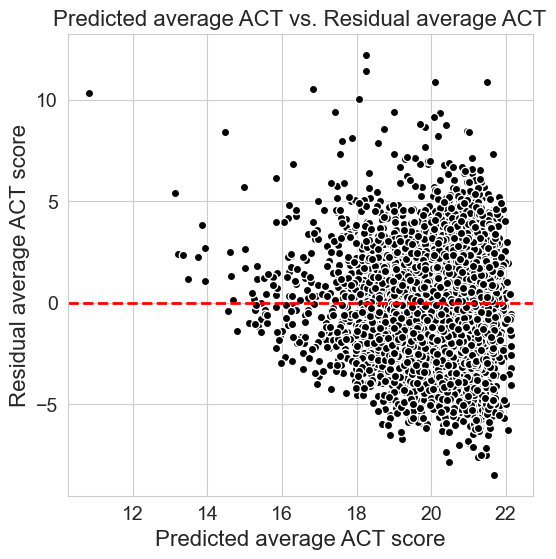

In [68]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat, model_unemployment.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)
plt.title('Predicted average ACT vs. Residual average ACT', fontsize=16)

plt.tick_params(labelsize=14)
plt.show()

## Quadratic Model: ACT vs Unemployment
- Both the linear and quadratic lines follow the same overall trend: as unemployment increases, ACT scores decrease.
- Based on this model, there is no strong quadratic or nonlinear pattern, so a simple linear model describes the relationship better.

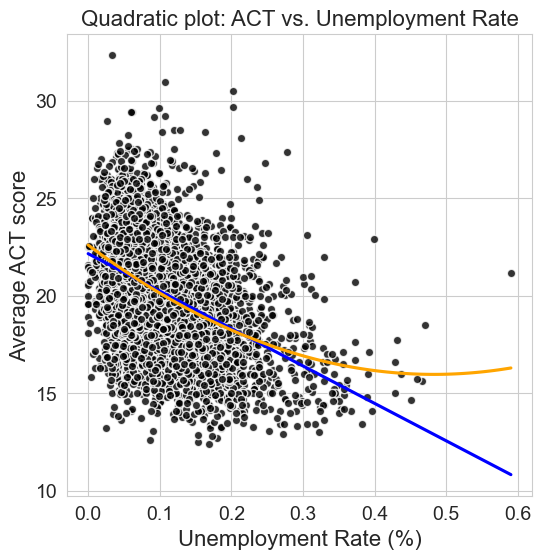

In [69]:
plt.figure(figsize=(6, 6))

sns.regplot(
    data=df,
    x='rate_unemployment',
    y='average_act',
    color='blue',
    ci=False,
    scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1}
)

sns.regplot(
    data=df,
    x='rate_unemployment',
    y='average_act',
    order=2,
    color='orange',
    ci=False,
    scatter=False
)

plt.xlabel('Unemployment Rate (%)', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)
plt.title('Quadratic plot: ACT vs. Unemployment Rate', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()


## Quadratic regression model
- This will help us undertand whether the relationship between unemployment and ACT is nonlinear.
- We can asnwer the question: Does adding a quadratic (squared) term for unemployment rate significantly improve the model's ability to predict average ACT scores?
  
- The quadratic model revealed that unemployment rate is a significant predictor of average ACT score, with both the linear and squared terms reaching statistical significance (p < 0.001). Although the quadratic model provided a slightly better fit (R-squared = 0.193 vs. 0.188), the improvement was minor, indicating that a simple linear relationship still offers a better and interpretable summary of the association between unemployment and ACT performance.

In [70]:
model_unemployment2 = smf.ols(
    formula='average_act ~ rate_unemployment + I(rate_unemployment**2)', 
    data=df).fit()

## Displaying the fit summary

In [71]:
print(model_unemployment2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     864.8
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:22:34   Log-Likelihood:                -16125.
No. Observations:                7227   AIC:                         3.226e+04
Df Residuals:                    7224   BIC:                         3.228e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

## Assessing the model significance

In [73]:
model_unemployment2.pvalues

Intercept                     0.000000e+00
rate_unemployment            1.085830e-100
I(rate_unemployment ** 2)     2.437025e-12
dtype: float64

In [74]:
anova_lm(model_unemployment, model_unemployment2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,7225.0,36934.395106,0.0,NaN,NaN,NaN
1,7224.0,36684.212690,1.0,250.182416,49.266909,2.437025e-12


## Assessing the accuracy of the quadratic model, using the mean absolute error

In [75]:
mean_absolute_error(df['average_act'], model_unemployment2.predict())

1.7382315226559761

## We can compara to the first model 
- This shows that it is smaller, but not too different, which is a realtively weak prediction

In [76]:
mean_absolute_error(df['average_act'], model_unemployment.predict())

1.7422190359432659

## Summary of Absolute error
- Although the quadratic model performs slightly better, the difference is minimal, confirming that both models have similar predictive accuracy and that the linear relationship remains an adequate summary of the data.

## Single input model: ACT VS Percent Lunch 
- Starting with a single-input model to explore whether there's a relationship between ACT scores and the perecent of students that qualify for free or reduced lunch.
- To explore the regression relationship, we'll plot the data and include a regression line to visualize the trend.

## Average ACT vs. Percent of Students that Qualify for Free or Reduced Lunch
- Schools with higher proportions of students receiving free/reduced lunch (a proxy for poverty) tend to have significantly lower ACT scores.
- The chart below shows a strong negative relationship: as the percentage of students on free/reduced lunch increases, average ACT scores  decrease

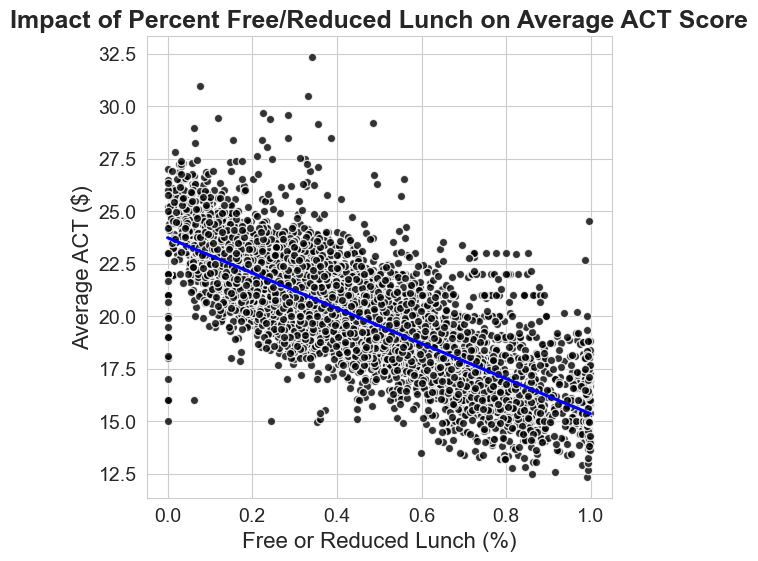

In [95]:
plt.figure(figsize=(6,6))

sns.regplot(data=df, 
            x='percent_lunch',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color':'black', 'edgecolor':'white', 'linewidths':1})

plt.xlabel('Free or Reduced Lunch (%)', fontsize=16)
plt.ylabel('Average ACT ($)', fontsize=16)
plt.title('Impact of Percent Free/Reduced Lunch on Average ACT Score', fontsize=18, fontweight='bold')

plt.tick_params(labelsize=14)

plt.show()

## Fit the model using a formula
- In this model, the percentage of students receiving free or reduced lunch (percent_lunch) is used as the independent variable, and the average ACT score (average_act) is the dependent variable.
- This allows us to estimate how changes in free/reduced lunch participation are associated with changes in ACT performance across schools.

In [88]:
model_lunch = smf.ols(formula='average_act ~ percent_lunch', data=df).fit()

In [89]:
print(model_lunch.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                 1.149e+04
Date:                Wed, 05 Nov 2025   Prob (F-statistic):               0.00
Time:                        01:12:25   Log-Likelihood:                -13461.
No. Observations:                7227   AIC:                         2.693e+04
Df Residuals:                    7225   BIC:                         2.694e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.7429      0.037    641.759

In [90]:
y_hat = model_lunch.predict()

## Numerical Evaluation of Model Accuracy (r-squared, RMSE, mean squared error, mean absolute error)
- The model explains 61.4% of the variation in average ACT scores (R-squared = 0.614) with an average prediction error of about 1.17 ACT points (MAE).
Compared to the unemployment model, this represents a much stronger fit and higher predictive accuracy.

In [94]:
metrics_lunch = {
    'R-squared': model_lunch.rsquared.round(4),
    'RMSE': np.sqrt(mean_squared_error(df['average_act'], y_hat)),
    'MAE': mean_absolute_error(df['average_act'], y_hat)
}
print("--- Percent Lunch Model Metrics ---")
print(pd.Series(metrics_lunch))

--- Percent Lunch Model Metrics ---
R-squared    0.613900
RMSE         1.558494
MAE          1.168949
dtype: float64


## Residual Analysis for ACT vs. Free/Reduced Lunch
- The residual plot shows a random scatter around zero, indicating that the linear model is appropriate and that no major nonlinear patterns are present.

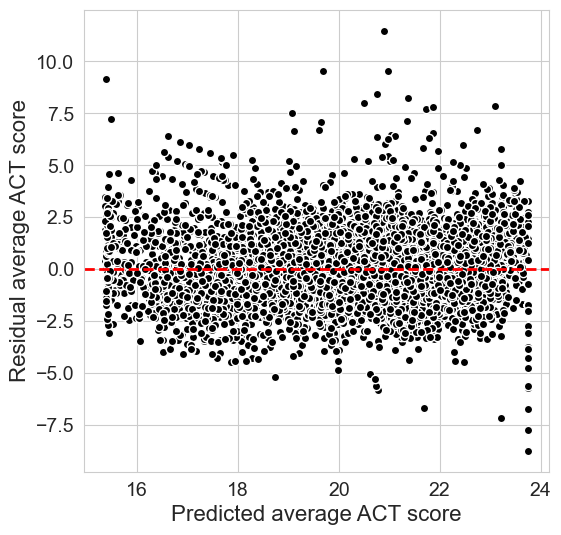

In [84]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat, model_lunch.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)
plt.show()

## Log-Transformation Model: ACT vs. Free/Reduced Lunch Percentage 
- This model applied a logarithmic transformation to the free/reduced lunch variable to test whether ACT scores declined rapidly at lower lunch rates and then leveled off at higher levels.
- Although the coefficient for log(percent_lunch) was negative and statistically significant (p < 0.001), the R-squared value dropped to 0.252, indicating a weaker overall fit.
- This confirms that a simple linear model better describes the relationship between free/reduced lunch participation and ACT scores than a log-transformed model.

In [85]:
model_lunch_log = smf.ols(
    formula='average_act ~ np.log(percent_lunch + 1e-5)', 
    data=df
).fit()

In [86]:
print(model_lunch_log.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     2432.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:22:59   Log-Likelihood:                -15852.
No. Observations:                7227   AIC:                         3.171e+04
Df Residuals:                    7225   BIC:                         3.172e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

## Single input model: ACT VS Number of Teachers 
- Exploring whether there's a relationship between ACT scores and the number of teachers per school.
- Using a scatterplot to see the realtionship
- Plot shows a slight positive relationship between the number of teachers and average ACT scores.

## Summary of the plot.
- This plot shows a slight positive relationship between the number of teachers and average ACT scores.
- Schools with more teachers tend to report marginally higher ACT scores, but the relationship is weak, as indicated by the wide scatter of data points around the regression line.
- This suggests that the number of teachers alone is not a strong predictor of academic performance — it may instead reflect school size or other structural factors rather than instructional quality or student support directly.

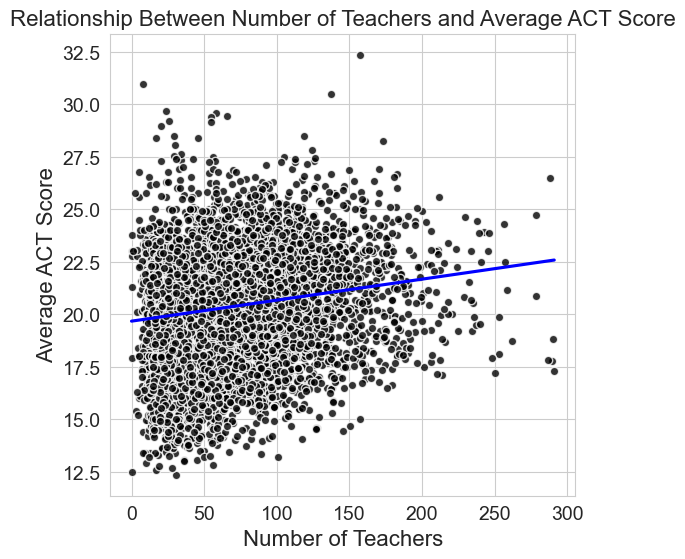

In [87]:
plt.figure(figsize=(6,6))

sns.regplot(data=df, 
            x='teachers',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color':'black', 'edgecolor':'white', 'linewidths':1})

# Add axis labels
plt.xlabel('Number of Teachers', fontsize=16)
plt.ylabel('Average ACT Score', fontsize=16)
plt.title('Relationship Between Number of Teachers and Average ACT Score', fontsize=16)
plt.tick_params(labelsize=14)

plt.show()

## Fitting the model using a formula
- Display the fit summary to get a better understanding.

In [88]:
model_number_of_teachers = smf.ols(formula='average_act ~ teachers', data=df).fit()

In [89]:
print(model_number_of_teachers.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     221.3
Date:                Sun, 19 Oct 2025   Prob (F-statistic):           2.56e-49
Time:                        16:23:06   Log-Likelihood:                -16791.
No. Observations:                7227   AIC:                         3.359e+04
Df Residuals:                    7225   BIC:                         3.360e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.6757      0.051    385.992      0.0

## Summary
This simple linear regression tests whether the number of teachers predicts a school's average ACT score. The model shows a statistically significant but weak positive relationship (β = 0.01, p < 0.001), indicating that schools with more teachers tend to have slightly higher ACT scores. However, the R-squared value (0.03) reveals that teacher count explains only about 3% of the variation in ACT performance. This suggests that while larger schools often have more teachers, the number of teachers alone is not a strong predictor of student outcomes.